# Winning Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [76]:
# Import the necessary modules
 # Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [77]:
# Bring each CSV into a separate data frame
# Read CSV
data_1 = pd.read_csv("WWE-Data-2013.csv")
data_2 = pd.read_csv("WWE-Data-2014.csv")
data_3 = pd.read_csv("WWE-Data-2015.csv")
data_4 = pd.read_csv("WWE-Data-2016.csv")

In [78]:
# Merge the first two datasets (2013 and 2014) on "Wrestler" so that no data is lost (should be 182 rows)
# Merge our two data frames together
combined_data_1 = pd.merge(data_1, data_2, on="Wrestler")
combined_data_2 = pd.merge(data_3, data_4, on="Wrestler")
combined_data = pd.merge(combined_data_1, combined_data_2, on="Wrestler")
combined_data.head()

,Wrestler,Wins_x_x,Losses_x_x,Draws_x_x,Wins_y_x,Losses_y_x,Draws_y_x,Wins_x_y,Losses_x_y,Draws_x_y,Wins_y_y,Losses_y_y,Draws_y_y
0,Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4
1,Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4
2,Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0
3,Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5
4,Ryback,103,88,3,43,114,1,138,34,2,37,17,1


In [79]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"
combined_data = combined_data.rename(columns={"Wins_x_x":"Wins_2013", "Losses_x_x":"Losses_2013","Wins_y_x":"Wins_2014", "Losses_y_x":"Losses_2014", "Wins_x_y":"Wins_2015", "Losses_x_y":"Losses_2015", "Wins_y_y":"Wins_2016", "Losses_y_y":"Losses_2016", 
                                              "Draws_x_x":"Draws_2013", "Draws_y_x":"Draws_2014", "Draws_x_y":"Draws_2015", "Draws_y_y":"Draws_2016" })

combined_data
# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"



,Wrestler,Wins_2013,Losses_2013,Draws_2013,Wins_2014,Losses_2014,Draws_2014,Wins_2015,Losses_2015,Draws_2015,Wins_2016,Losses_2016,Draws_2016
0,Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4
1,Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4
2,Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0
3,Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5
4,Ryback,103,88,3,43,114,1,138,34,2,37,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Adam Rose,4,1,0,86,21,0,8,142,1,6,23,0
63,Konnor,5,0,0,49,29,0,19,141,0,2,110,1
64,Alexa Bliss,1,3,0,24,19,0,19,37,0,35,90,0
65,Becky Lynch,0,4,0,27,21,0,71,59,1,102,54,5


In [80]:
combined_data = combined_data.set_index('Wrestler')
combined_data

,Wins_2013,Losses_2013,Draws_2013,Wins_2014,Losses_2014,Draws_2014,Wins_2015,Losses_2015,Draws_2015,Wins_2016,Losses_2016,Draws_2016
Wrestler,,,,,,,,,,,,
Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4
Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4
Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0
Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5
Ryback,103,88,3,43,114,1,138,34,2,37,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Adam Rose,4,1,0,86,21,0,8,142,1,6,23,0
Konnor,5,0,0,49,29,0,19,141,0,2,110,1
Alexa Bliss,1,3,0,24,19,0,19,37,0,35,90,0


In [81]:
data_cleanup = combined_data.fillna(0)
data_cleanup["Total Wins"] = data_cleanup["Wins_2013"] + data_cleanup["Wins_2014"] + data_cleanup["Wins_2015"] + data_cleanup["Wins_2016"]
data_cleanup["Total Losses"] = data_cleanup["Losses_2013"] + data_cleanup["Losses_2014"] + data_cleanup["Losses_2015"] + data_cleanup["Losses_2016"]
data_cleanup["Total Draws"] = data_cleanup["Draws_2013"] + data_cleanup["Draws_2014"] + data_cleanup["Draws_2015"] + data_cleanup["Draws_2016"]
data_cleanup["Total Matches"] = data_cleanup["Total Wins"] + data_cleanup["Total Losses"] + data_cleanup["Total Draws"] 
data_cleanup

,Wins_2013,Losses_2013,Draws_2013,Wins_2014,Losses_2014,Draws_2014,Wins_2015,Losses_2015,Draws_2015,Wins_2016,Losses_2016,Draws_2016,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4,482,300,15,797
Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4,227,454,13,694
Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0,282,181,14,477
Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5,496,199,21,716
Ryback,103,88,3,43,114,1,138,34,2,37,17,1,321,253,7,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Adam Rose,4,1,0,86,21,0,8,142,1,6,23,0,104,187,1,292
Konnor,5,0,0,49,29,0,19,141,0,2,110,1,75,280,1,356
Alexa Bliss,1,3,0,24,19,0,19,37,0,35,90,0,79,149,0,228


In [83]:
data_over_100 = data_cleanup.loc[(data_cleanup["Total Matches"] >= 100) & (data_cleanup["Wins_2013"] > 0) & (data_cleanup["Wins_2013"] > 0)]
data_over_100

,Wins_2013,Losses_2013,Draws_2013,Wins_2014,Losses_2014,Draws_2014,Wins_2015,Losses_2015,Draws_2015,Wins_2016,Losses_2016,Draws_2016,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4,482,300,15,797
Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4,227,454,13,694
Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0,282,181,14,477
Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5,496,199,21,716
Ryback,103,88,3,43,114,1,138,34,2,37,17,1,321,253,7,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viktor,6,1,0,51,33,0,19,143,0,2,145,1,78,322,1,401
Adam Rose,4,1,0,86,21,0,8,142,1,6,23,0,104,187,1,292
Konnor,5,0,0,49,29,0,19,141,0,2,110,1,75,280,1,356


In [84]:
data_wins = data_over_100[["Wins_2013","Wins_2014","Wins_2015","Wins_2016"]].sum(axis=1)
data_wins

Wrestler
Dean Ambrose    482
Seth Rollins    227
Randy Orton     282
Roman Reigns    496
Ryback          321
               ... 
Viktor           78
Adam Rose       104
Konnor           75
Alexa Bliss      79
Simon Gotch     104
Length: 65, dtype: int64

In [85]:
data_losses = data_over_100[["Losses_2013","Losses_2014","Losses_2015","Losses_2016"]].sum(axis=1)
data_losses

Wrestler
Dean Ambrose    300
Seth Rollins    454
Randy Orton     181
Roman Reigns    199
Ryback          253
               ... 
Viktor          322
Adam Rose       187
Konnor          280
Alexa Bliss     149
Simon Gotch     185
Length: 65, dtype: int64

In [48]:
wrestlers_name = input(" enter the name of the wrestler of your choice ? ")

wins_df = data_wins.loc[wrestlers_name, ["Wins_2013","Wins_2014", "Wins_2015", "Wins_2016"]]
wins_df.keys()

 enter the name of the wrestler of your choice ? Adam Rose


Index(['Wins_2013', 'Wins_2014', 'Wins_2015', 'Wins_2016'], dtype='object')

In [49]:
losses_df = data_losses.loc[wrestlers_name, ["Losses_2013","Losses_2014", "Losses_2015", "Losses_2016"]]
losses_df

Losses_2013      1
Losses_2014     21
Losses_2015    142
Losses_2016     23
Name: Adam Rose, dtype: int64

In [50]:
type(losses_df)

pandas.core.series.Series

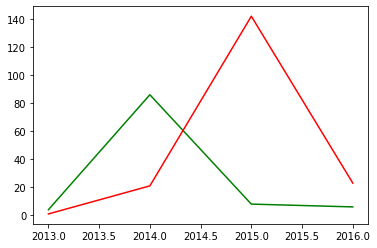

In [51]:
years = [2013, 2014, 2015, 2016]
plt.plot(years, wins_df, color="green", label="Wins")
plt.plot(years, losses_df, color="red", label="losses")